# Deep Learning Fundamentals Lab 4 -- Neural Network In Pure PyTorch

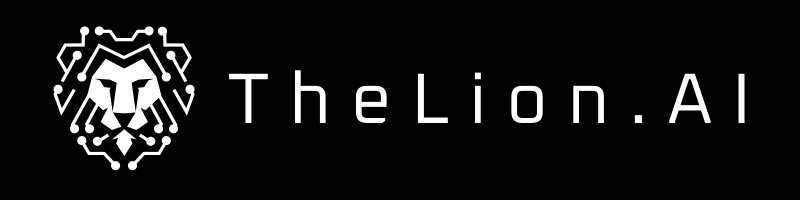

Welcome to the next installment of our Deep Learning Fundamentals laboratory series, presented by [TheLion.AI](https://www.thelion.ai/) — an interdisciplinary research group specializing in AI-based healthcare solutions. This comprehensive program is designed to equip you with practical skills in implementing deep learning models across various domains, with a special emphasis on natural language processing and computer vision. We like to make our software and teaching materials as accessible as possible. If you like what we do, consider supporting us at [https://buymeacoffee.com/thelionai](https://buymeacoffee.com/thelionai).

The course follows a progressive learning path, starting with foundational concepts and gradually building up to advanced techniques. Each lab session includes a brief overview of key concepts and hands-on coding exercises.

**New notebooks will be added weekly!**

### Syllabus
1. [Introduction to sci-kit learn](https://www.kaggle.com/code/basia25/introduction-to-scikit-learn/)
2. [Introduction to linear algebra in PyTorch](https://www.kaggle.com/code/basia25/introduction-to-linear-algebra-in-pytorch/)
3. [Neural network from scratch](https://www.kaggle.com/code/basia25/neural-network-from-scratch/)
4. [Neural network in pure PyTorch](https://www.kaggle.com/code/basia25/neural-network-in-pure-pytorch/)
5. [Neural network in PyTorch Lightning](https://www.kaggle.com/code/basia25/intro-to-pytorch-lightning)
6. [Regularization methods](https://www.kaggle.com/code/basia25/introduction-to-regularization/)
7. [Convolutional neural networks](https://www.kaggle.com/code/basia25/introduction-to-convolutional-neural-networks/)
8. [State-of-the-art CNNs](https://www.kaggle.com/code/basia25/introduction-to-state-of-the-art-cnns/)
9. [Image segmentation](https://www.kaggle.com/code/basia25/introduction-to-image-segmentation)
10. NLP fundamentals
11. HuggingFace
12. Sentence transformers
13. Explainable AI
14. Image transformer and AI in Healthcare
15. Running experiments in ClearML
16. Creating smart configuration files with Hydra

# Introduction

In this exercise, we will explore the process of creating a custom dataset, implementing a neural network, and training it using PyTorch. PyTorch is a powerful deep learning framework that provides flexibility and efficiency for building and training neural networks. We will cover key concepts such as datasets, data loaders, neural network architecture, loss functions, and optimization techniques. By the end of this exercise, you will have a solid understanding of how to work with custom datasets and train a neural network from scratch in PyTorch.

### Key Concepts
- **Datasets**: A dataset is a collection of data samples and their corresponding labels. In PyTorch, we create custom datasets by subclassing the Dataset class and implementing the `__init__`, `__len__`, and `__getitem__` methods.

- **Data Loaders**: Data loaders are used to efficiently load data from a dataset in batches, allowing for parallel data loading and augmentation.

- **Neural Networks**: Neural networks consist of layers that transform input data into meaningful output. We define neural networks in PyTorch by subclassing the `nn.Module` class and implementing the `__init__` and `forward` methods.

- **Loss Functions**: Loss functions measure the discrepancy between the predicted output and the true labels. Common loss functions include `CrossEntropyLoss` and `MSELoss`.

- **Optimizers**: Optimizers update the network's weights based on the computed gradients to minimize the loss function. Adam is a popular optimizer that adapts the learning rate during training.

## Dataset

### Non-standard Dataset in PyTorch

Assuming our data is in NumPy format, we will create a custom PyTorch dataset object to load this data.

### Data Loading

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
data = load_digits().data

In [ ]:
data.shape

In [ ]:
data[0]

In [ ]:
targets = load_digits().target

In [ ]:
targets.shape

In [ ]:
targets[0]

### Splitting Data into Training and Testing Sets

We can use the `train_test_split()` function from the sklearn library to split the data. The `stratify = target` parameter ensures that the class distribution is the same in both the training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(data, # X
                                                                    targets, # y
                                                                    train_size = 0.8, # portion of data allocated to the training set
                                                                    stratify = targets # data according to which we perform stratification
                                                                    )

In [ ]:
train_data.shape

In [ ]:
test_data.shape

### `Dataset` class

To create a custom dataset in PyTorch, we need to create a class that inherits from the Dataset class. Our class must implement at least 3 methods:
- `__init__(self, *args, **kwargs)`: This method is called when initializing the object. We should assign all data used in the dataset here. Note — it's best if all data is in NumPy format, otherwise the dataset may have problems with multi-threading.
- `__len__(self)`: This function returns the size of our dataset.
- `__getitem__(self, idx)`: This function returns a specific element from the dataset at index `idx`.

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class DigitsDataset(Dataset):
  def __init__(self, data, targets):
    self.data = data
    self.targets = targets

  def __len__(self):
    return len(self.data)

  def __getitem__(self,idx):
    x = self.data[idx]/16
    y = self.targets[idx]

    return x, y


### Initializing datasets

In [ ]:
train_dataset = DigitsDataset(train_data, train_targets)

In [ ]:
test_dataset = DigitsDataset(test_data, test_targets)

In [ ]:
single_item =  test_dataset[0]

x

In [ ]:
single_item[0]

y

In [ ]:
single_item[1]

## Dataloader

The data loader is responsible for loading data from the dataset — dividing it into batches that are processed simultaneously, loading them in a specified order, etc.

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True)

In [ ]:
test_dataloader = DataLoader(test_dataset, batch_size  = 32, shuffle = False)

### Loading a Single Batch

In [ ]:
single_batch = next(iter(test_dataloader))

x

In [ ]:
single_batch[0].shape

In [ ]:
single_batch[0].max()

y

In [ ]:
single_batch[1].shape

## Neural Network

### Basic Layers Available in PyTorch
You can find basic layers in `torch.nn`.

- Fully connected layer: `nn.Linear(in_features, out_features)`
    - `in_features`: The size of the input to the layer.
    - `out_features`: The size of the output from the layer.
    - Note: The weights in the layer are a matrix of shape `(out_features, in_features)`

In [ ]:
from torch import nn

In [ ]:
fc = nn.Linear(10,20)

In [ ]:
fc

### Inintialy the weights are random

In [ ]:
fc.weight

In [ ]:
fc.weight.shape

## Basic Activation Functions Available in PyTorch

Basic activation functions can be found in `torch.nn.functional`

In [ ]:
import torch.nn.functional as F

In [ ]:
from torch import Tensor

In [ ]:
F.softmax(Tensor([1,2,3]), dim=0)

### Creating a Neural Network in PyTorch

To create a neural network in PyTorch, we need to create a class that inherits from the `torch.nn.Module` class. Our class must implement at least 2 functions:
- `__init__(self, *args, **kwargs)`: Initializes all network parameters (e.g., layers).
- `forward(self, x)`: Implements the logic of passing data forward through the neural network.

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, num_classes):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_size, 100)  # creating the first layer
    self.fc2 = nn.Linear(100, num_classes) # creating the second layer

  def forward(self, x):
    out = self.fc1(x) # input x passes through the first layer
    out = F.relu(out) # applying the activation function to the first layer
    out = self.fc2(out) # output of the first layer passes through the second layer
    if not self.training:
      out = F.softmax(out, dim=1) # if the network is not in training mode, the output of the second layer passes through the softmax activation function
    return out

In [ ]:
model = Model(64,10)

## Training

### Loss Functions

Loss functions are available in the `torch.nn` module. Loss function always returns a scalar.

In [ ]:
ce_loss = nn.CrossEntropyLoss() # classification
mse_loss = nn.MSELoss() # regression

In [ ]:
ce_loss(Tensor([[0.1,0.1,0.8]]), Tensor([[0,0,1]]))

In [ ]:
mse_loss(Tensor([[0.1,0.1,0.8]]), Tensor([[0,0,1]]))

To calculate gradients with the loss function, we call `loss.backward()`.

In [ ]:
import torch

In [ ]:
x = torch.zeros((1,3), dtype=torch.float32, requires_grad=True)
y = torch.ones((1,3), dtype= torch.float32, requires_grad=True)

In [ ]:
x

In [ ]:
y

In [ ]:
loss =  ce_loss(x,y)

In [ ]:
loss

In [ ]:
loss.backward()

In [ ]:
x.grad

Be careful! Loss function `CrossEntropyLoss()` in PyTorch already has softmax, so we shouldn't use softmax in the last layer during the training.

More loss functions: https://neptune.ai/blog/pytorch-loss-functions

## Optimizers

Optimizers are available in the `torch.optim` module.

In [ ]:
from torch import optim

Optimizers take the parameters of the neural network (`model.parameters()`) as an argument during initialization. These parameters will be updated by the optimizer during training.

In [ ]:
model.parameters

In [ ]:
adam = optim.Adam(model.parameters())

### Using the Optimizer to Update Weights

The optimizer updates the network's weights using the `optimizer.step()` function, which utilizes the computed weight gradients to update them. First, we need to compute the loss function and perform backpropagation before using the optimizer.

In [ ]:
model = Model(64,10)

adam = optim.Adam(model.parameters())

Initial weights of layer 1

In [ ]:
model.fc1.weight

Prediction (100 random data points)

In [ ]:
y = model(torch.rand(100,64))

Computing the loss function

In [ ]:
loss = ce_loss(y, torch.ones(100,10))

Propagating the error through the network layers (computing gradients)

In [ ]:
loss.backward()

Gradient of the weights

In [ ]:
model.fc1.weight.grad

Using the optimizer to update the weights based on the gradient

In [ ]:
adam.step()

New weight values

In [ ]:
model.fc1.weight

### Clearing Gradients

After each weight update by the optimizer, we want to clear the gradients (to compute new ones from the beginning for a different set of data). This is done using the optimizer.zero_grad() function.

In [ ]:
model.fc1.weight.grad

In [ ]:
adam.zero_grad()

In [ ]:
model.fc1.weight.grad

# Exercises

## 1. Dataset

We will load similar data - handwritten digits but in size 28x28.

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml("mnist_784")

In [ ]:
import numpy as np

In [ ]:
data = mnist.data.to_numpy()
targets = np.vectorize(lambda x: int(x))(mnist.target.to_numpy())

In [ ]:
data.shape

In [ ]:
targets.shape

### 1.1 Splitting Data into Training and Testing Sets with Stratification
Split the data into training and testing sets in an 80/20 ratio with stratification.

In [ ]:
train_data, test_data, train_targets, test_targets = _

In [ ]:
train_data.shape

In [ ]:
test_data.shape

### 1.2 Implement a dataset

Note: The pixels in the new dataset are stored as values from 0-255 instead of 0-16 as before. Consider this in normalization.

In [ ]:
from torch.utils.data import Dataset


In [ ]:
class DigitsDataset(Dataset):
  def __init__(self, data, targets):


  def __len__(self):


  def __getitem__(self,idx):


    return x, y


In [ ]:
train_dataset = DigitsDataset(train_data, train_targets)

In [ ]:
test_dataset = DigitsDataset(test_data, test_targets)

Verifying the Data

X

In [ ]:
train_dataset[0][0]

y

In [ ]:
train_dataset[0][1]

### 2.3. Implement the data loader.

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dataloader =

In [ ]:
test_dataloader =

In [ ]:
from torch import nn
import torch.nn.functional as F


## 2. Implementing a neural network

### 2.1. Implement a neural network

The network should have 2 hidden layers - the first layer with 200 neurons, the second with 100.

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, num_classes):
    super(Model, self).__init__()
    self.fc1 =
    self.fc2 =
    self.fc3 =

  def forward(self, x):
    out =
    out =
    out =
    out =
    out =
    if not self.training:
      out = F.softmax(out, dim=1) # If the network is not in training mode, the output of the second layer passes through the softmax activation function
    return out

## 3. Training

In [ ]:
from torch import optim
import torch

### 3.1. Initialize the model, loss function, and optimizer.

- Loss function: CrossEntropy
- Optimizer: Adam

In [ ]:
model = _

loss_function = _
optimizer =  _

3.2 Complete the training loop

In [ ]:
train_losses = []
test_losses = []

for epoch in range(10):

  epoch_train_loss = 0.
  epoch_test_loss = 0.


  for data in train_dataloader:
    inputs, labels = data

    # TODO: Zero the gradients

    # TODO: Compute model predictions (may need to convert data to float - inputs.float())
    outputs =

    # TODO: Compute the loss function
    loss =

    # TODO: Compute gradients

    # TODO: Update the model weights using the optimizer

    epoch_train_loss += loss.item()

  with torch.no_grad(): # For test data, we do not compute gradients
    for test_data in test_dataloader:
      inputs, labels = test_data
      # TODO: Compute model predictions (may need to convert data to float - inputs.float())

      outputs =

      #TODO: Compute the loss function
      loss =

      epoch_test_loss += loss.item()


  print(f"Epoch {epoch} train loss {epoch_train_loss/len(train_dataloader)}, test_loss {epoch_test_loss/len(test_dataloader)}")
  train_losses.append(epoch_train_loss/len(train_dataloader))
  test_losses.append(epoch_test_loss/len(test_dataloader))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(list(range(10)),train_losses)
plt.plot(list(range(10)),test_losses)